In [7]:
import pandas as pd
import os

# task1: merging 12 months of data into a single CSV file

In [12]:
#df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
#df.head()

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()#create empty data frame

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index=False)    


# Read in updated dataframe
(so we dont need to do all the above code again)


In [14]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Clean the data

### Drop cells of NAN

In [22]:
nan_df = all_data[all_data.isna().any(axis=1)] #to find NAN columns
#nan_df.head()

all_data = all_data.dropna(how="all")


### Find "Or" and delet it

In [57]:
all_data = all_data[all_data["Order Date"].str[0:2]!="Or"]

In [63]:

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


### Convert columns to the correct type

In [29]:
all_data ["Quantity Ordered"] = pd.to_numeric(all_data ["Quantity Ordered"]) #Make int
all_data ["Price Each"] = pd.to_numeric(all_data ["Price Each"])  #make float

# Augmented data with additional columns

### Task 2: Add month column

In [26]:
all_data["month"] = all_data["Order Date"].str[0:2] #allow us to access a column as a string
# we need to convert the data type in the "month" column from string to int
all_data["month"] = all_data["month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task 3: add a sales columns

In [31]:
all_data["sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Task 4: add a city column

In [73]:
# use .apply()

def get_city(address):
    f = address.split(",")[1] + ", "+address.split(",")[2].split(" ")[1]
    return f

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x)) ##apply method to apply any function on column
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


### Task 5: add hour column

We cant always use the method below with time and date specially that the formate may change along the data

In [94]:
#all_data["hour"] =all_data["Order Date"].apply(lambda x: x.split(" ")[1].split(":")[0])
#all_data.head()

One smart way is to use the panda datetime library. First we change the formate of the "Order Date" column to the panda.datetime formate to fix everything

In [96]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",07
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


Now to add the hour holumn we do the following 

In [97]:
all_data["hour"] = all_data["Order Date"].dt.hour #we can extract minute the same war dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


## Question 1: What was the best month for sales? How much was earned that month?

In [37]:
results = all_data.groupby("month").sum()
#all_data.groupby("month").sum()["sales"]

/var/folders/g2/y_d46rvj6flb8jmvq7myd9qm0000gn/T/ipykernel_42066/1573709692.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("month").sum()


##### plot the data

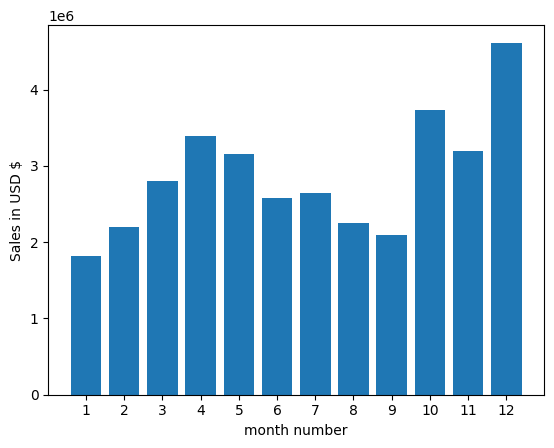

In [41]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['sales'])

plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('month number')

plt.show()

## Question 2: What city had the highest number of sales?

In [85]:
results2 = all_data.groupby("City").sum()
results2.head(100)

/var/folders/g2/y_d46rvj6flb8jmvq7myd9qm0000gn/T/ipykernel_42066/3314087403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results2 = all_data.groupby("City").sum()


,Quantity Ordered,Price Each,month,sales
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


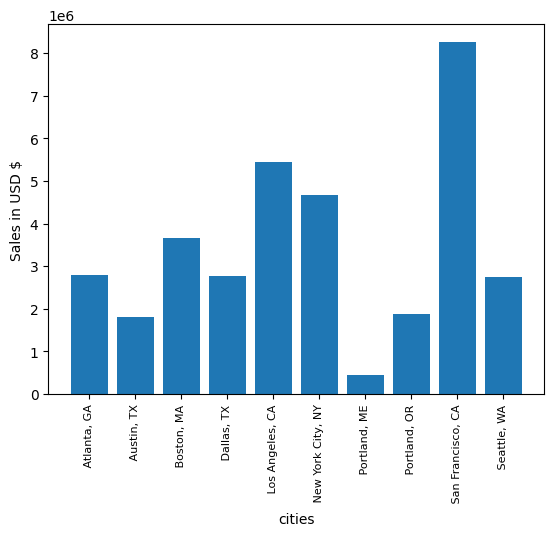

In [86]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby("City")]

plt.bar(cities, results2['sales'])

plt.xticks(cities, rotation = "vertical", size =8)
plt.ylabel('Sales in USD $')
plt.xlabel('cities')

plt.show()

## Question 3: What time should we display advertisments to maximize likelihood of customer's buying product?

In [99]:
results = all_data.groupby("hour").sum()
results.head()

/var/folders/g2/y_d46rvj6flb8jmvq7myd9qm0000gn/T/ipykernel_42066/359224710.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby("hour").sum()


,Quantity Ordered,Price Each,month,sales
hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01


/var/folders/g2/y_d46rvj6flb8jmvq7myd9qm0000gn/T/ipykernel_42066/1514236537.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results3=all_data.groupby("hour").sum()


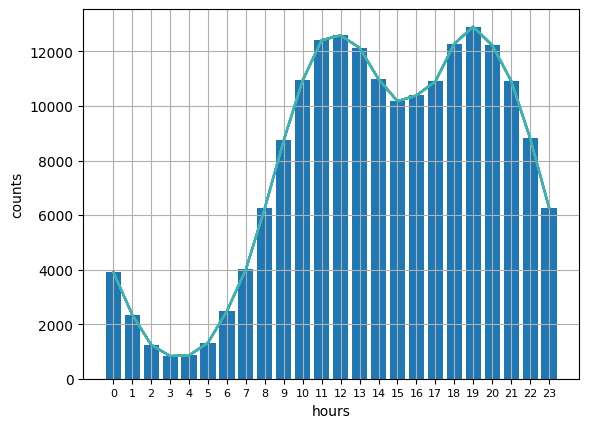

In [119]:
import matplotlib.pyplot as plt

hours = [time for time, df in all_data.groupby("hour")]
all_data["count"]=1
results3=all_data.groupby("hour").sum()


plt.plot(hours, all_data.groupby("hour").count())#we cant use count to create a bar chart 
#all_data.groupby("hour").count()
plt.bar(hours, results3["count"])

plt.xticks(hours, size =8)
plt.ylabel('counts')
plt.xlabel('hours')

plt.grid()
plt.show()

In [125]:
all_data.count()

Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
month               185950
sales               185950
City                185950
hour                185950
count               185950
dtype: int64

In [140]:
import numpy as np
temp_data = all_data.groupby(['Order ID']).agg(np.mean).count()
temp_data.head()

#new_data = pd.DataFrame()
#order_id=[]
#for key,df in temp_data:
#    order_id.append(key)
    
    

/var/folders/g2/y_d46rvj6flb8jmvq7myd9qm0000gn/T/ipykernel_42066/15647994.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = all_data.groupby(['Order ID']).agg(np.mean).count()


Quantity Ordered    178437
Price Each          178437
month               178437
sales               178437
hour                178437
dtype: int64

### Question 4: what products are most often sold together?